In [1]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), '2_analise'))
except:
	pass

 # Análise de Dados
 ## Projetos do Kickstarter
 ### Noel Viscome Eliezer

 Dataset: https://www.kaggle.com/kemical/kickstarter-projects


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
kickst = pd.read_csv('ks-projects-201801.csv', parse_dates=['deadline', 'launched'])
kickst = kickst[(kickst.pledged > 0) & (kickst.backers > 0)]
kickst['pledged_ratio'] = kickst['pledged'] / kickst['goal']

 Usar escala logarítmica torna a visualização dos dados mais simples, e coloca acima de 0 os projetos que atingiram a meta, e abaixo de 0 os que não atingiram

In [4]:
kickst['log_pledged_ratio'] = np.log10(kickst['pledged_ratio'])
kickst['log_usd_pledged_real'] = np.log10(kickst['usd_pledged_real'])
kickst['log_usd_goal_real'] = np.log10(kickst['usd_goal_real'])
kickst['log_backers'] = np.log10(kickst['backers'])
kickst = kickst.sample(10000)

In [5]:
kickst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 316390 to 314565
Data columns (total 20 columns):
ID                      10000 non-null int64
name                    9999 non-null object
category                10000 non-null object
main_category           10000 non-null object
currency                10000 non-null object
deadline                10000 non-null datetime64[ns]
goal                    10000 non-null float64
launched                10000 non-null datetime64[ns]
pledged                 10000 non-null float64
state                   10000 non-null object
backers                 10000 non-null int64
country                 10000 non-null object
usd pledged             10000 non-null float64
usd_pledged_real        10000 non-null float64
usd_goal_real           10000 non-null float64
pledged_ratio           10000 non-null float64
log_pledged_ratio       10000 non-null float64
log_usd_pledged_real    10000 non-null float64
log_usd_goal_real       10000 non-nu

In [6]:
kickst.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,pledged_ratio,log_pledged_ratio,log_usd_pledged_real,log_usd_goal_real,log_backers
count,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.068889e+09,5.456209e+04,9.971578e+03,108.308500,7.650978e+03,9.526651e+03,5.207957e+04,1.287529e+00,-0.862002,2.888488,3.750489,1.267332
std,6.219585e+08,1.481471e+06,5.340781e+04,503.596364,4.301262e+04,5.208348e+04,1.486336e+06,1.030198e+01,1.220102,1.144844,0.717134,0.809510
min,1.381190e+05,1.000000e+00,1.000000e+00,1.000000,0.000000e+00,5.300000e-01,1.000000e+00,1.000000e-08,-8.000000,-0.275724,0.000000,0.000000
25%,5.315194e+08,2.000000e+03,1.360000e+02,4.000000,8.686250e+01,1.350000e+02,2.000000e+03,2.500000e-02,-1.602060,2.130334,3.301030,0.602060
50%,1.063211e+09,5.250000e+03,1.156000e+03,20.000000,7.125350e+02,1.155005e+03,5.500000e+03,2.797521e-01,-0.553227,3.062584,3.740363,1.301030
75%,1.612536e+09,1.500000e+04,5.237500e+03,73.000000,3.994000e+03,5.211432e+03,1.500000e+04,1.104628e+00,0.043216,3.716957,4.176091,1.863323
max,2.146606e+09,1.000000e+08,2.209270e+06,27060.000000,1.552257e+06,2.209270e+06,1.000000e+08,7.070000e+02,2.849419,6.344249,8.000000,4.432328


 Analisando a distribuição, podemos perceber que há uma concentração inicial de projetos com backing de apenas US$1.
 Após isso, gradualmente cresce e se concentra principalmente entre projetos com aproximadamente US$900 e US$20,000.

(array([ 289.,  267.,  502.,  971., 1325., 1560., 2070., 1880.,  817.,
         242.,   61.,   16.]),
 array([-0.27572413,  0.27594028,  0.82760469,  1.3792691 ,  1.93093351,
         2.48259792,  3.03426233,  3.58592674,  4.13759115,  4.68925556,
         5.24091997,  5.79258438,  6.3442488 ]),
 <a list of 12 Patch objects>)

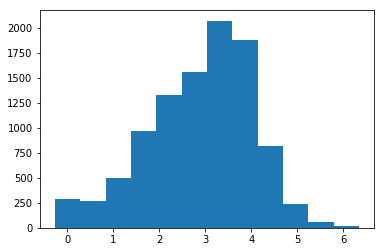

In [7]:
plt.hist(kickst.log_usd_pledged_real, bins = 12)

 Abaixo

([array([2.65e+02, 2.36e+02, 4.31e+02, 8.18e+02, 1.04e+03, 9.57e+02,
         7.13e+02, 3.61e+02, 9.40e+01, 1.00e+01, 1.00e+00, 0.00e+00]),
  array([ 266.,  238.,  438.,  834., 1135., 1399., 1896., 1782.,  780.,
          231.,   61.,   16.])],
 array([-0.27572413,  0.27594028,  0.82760469,  1.3792691 ,  1.93093351,
         2.48259792,  3.03426233,  3.58592674,  4.13759115,  4.68925556,
         5.24091997,  5.79258438,  6.3442488 ]),
 <a list of 2 Lists of Patches objects>)

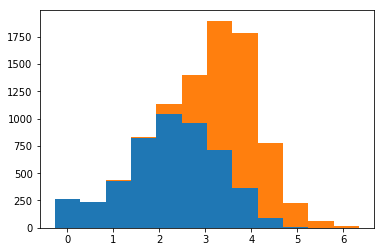

In [8]:
plt.hist([kickst[kickst.state == "failed"].log_usd_pledged_real, kickst[kickst.state == "successful"].log_usd_pledged_real], stacked=True, bins = 12)

 No gráfico abaixo, analisamos agora o ratio, vendo a relação entre a meta e o valor arrecadado, e vemos que a distribuição é semelhante ao longo de todo o espectro a partir de US$100.

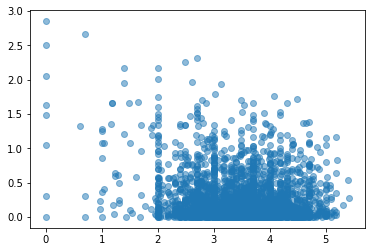

In [9]:
plt.scatter(y = 'log_pledged_ratio', x = 'log_usd_goal_real', data=kickst[kickst.state == "successful"], alpha= 0.5)